In [1]:
import cv2
import pyautogui
import win32gui
import datetime

face_cascade = cv2.CascadeClassifier(r'C:\Users\saash\OneDrive\Desktop\final project\haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while 1:

    # reads frames from a camera
    ret, img = cap.read()

    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detects faces of different sizes in the input image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    #for (x,y,w,h) in faces:
        # To draw a rectangle in a face
     #   cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)
       # roi_gray = gray[y:y+h, x:x+w]
      #  roi_color = img[y:y+h, x:x+w]

    # Display an image in a window
    cv2.imshow('Smile!',img)
    
    # myScreenshot = pyautogui.screenshot(region=(95,95, 605, 510))
    
    now = datetime.datetime.now()
    # filename = f"screenshot_{now.strftime('%Y-%m-%d_%H-%M-%S')}.png"
    filename = f"C:/Users/saash/OneDrive/Desktop/final project/screenshot/screenshot_{now.strftime('%Y-%m-%d_%H-%M-%S')}.png"
    
    handle = win32gui.FindWindow(None, 'Smile!')
    left, top, right, bottom = win32gui.GetWindowRect(handle)
    myScreenshot = pyautogui.screenshot(region=(left, top, right - left, bottom - top))
    myScreenshot.save(filename)
    # Wait for Esc key to stop
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

# Close the window
cap.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()

In [2]:
import cv2
import os

In [3]:
from deepface import DeepFace

In [4]:
def get_latest_screenshot(folder_path):
    # Get a list of all files in the folder
    files = os.listdir(folder_path)

    # Filter the list to only include PNG files
    png_files = [f for f in files if f.endswith(".png")]

    # Sort the list by modification time (most recent first)
    png_files.sort(key=lambda f: os.path.getmtime(os.path.join(folder_path, f)), reverse=True)

    # Get the full path of the most recent PNG file
    latest_file = os.path.join(folder_path, png_files[0])

    return latest_file

# Set the path to the folder where the screenshots are saved
folder_path = r"C:\Users\saash\OneDrive\Desktop\final project\screenshot"

# Get the full path of the latest screenshot
latest_file = get_latest_screenshot(folder_path)

# Load the latest screenshot using cv2.imread
latest_screenshot = cv2.imread(latest_file)


In [5]:
#img=cv2.imread("photo.png")

In [6]:
import matplotlib.pyplot as plt

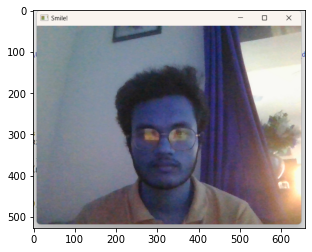

In [7]:
plt.imshow(latest_screenshot)

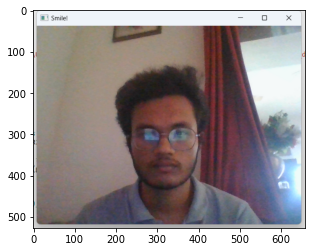

In [8]:
plt.imshow(cv2.cvtColor(latest_screenshot,cv2.COLOR_BGR2RGB))

In [9]:
predictions =DeepFace.analyze(latest_screenshot)

Action: race: 100%|██████████| 4/4 [00:06<00:00,  1.59s/it]   


In [10]:
predictions

[{'emotion': {'angry': 39.38165307044983,
   'disgust': 5.811209575767862e-05,
   'fear': 0.23059030063450336,
   'happy': 0.03001178556587547,
   'sad': 0.4067574627697468,
   'surprise': 0.009529850649414584,
   'neutral': 59.94139909744263},
  'dominant_emotion': 'neutral',
  'region': {'x': 217, 'y': 215, 'w': 189, 'h': 189},
  'age': 34,
  'gender': {'Woman': 2.553021162748337, 'Man': 97.4469780921936},
  'dominant_gender': 'Man',
  'race': {'asian': 51.614323354621135,
   'indian': 12.347993990659356,
   'black': 8.69499794810998,
   'white': 6.821003962815044,
   'middle eastern': 5.555315646846035,
   'latino hispanic': 14.966371057413284},
  'dominant_race': 'asian'}]

In [11]:
type(predictions)

list

In [12]:
predictions[0]['dominant_emotion']


'neutral'

TRYING TO DRAW RECTANGLE

In [13]:
faceCascade = cv2.CascadeClassifier(r'C:\Users\saash\OneDrive\Desktop\final project\haarcascade_frontalface_default.xml')



In [14]:
gray=cv2.cvtColor(latest_screenshot,cv2.COLOR_BGR2GRAY)
   #PRINT(faceCascade.empty())
faces=faceCascade.detectMultiScale(gray,1.1,4)
   #DRAW RECTANGLE AROUND THE FACE
for(x,y,w,h) in faces:
    cv2.rectangle(latest_screenshot , (x,y),(x+w,y+h),(0,255,0),2)

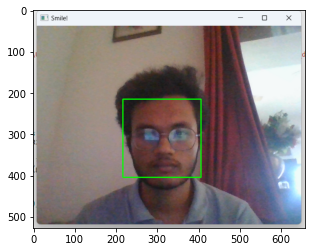

In [15]:
plt.imshow(cv2.cvtColor(latest_screenshot,cv2.COLOR_BGR2RGB))

In [16]:
font=cv2.FONT_HERSHEY_SIMPLEX

    #use putText() method for inserting text 
cv2.putText(latest_screenshot,
                predictions[0]['dominant_emotion'],
                (50,100),
                font, 4,
                (100,50,255),
                5,
                cv2.LINE_4);

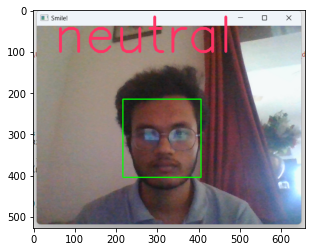

In [17]:
plt.imshow(cv2.cvtColor(latest_screenshot,cv2.COLOR_BGR2RGB))